# Lesson 5

## Intro

Hello, everyone! Here is the material for the fifth lesson. 

Today we are going to talk about such a concept as *regression*, or more specifically, *regressive analysis*.

### Problem Statement.

The traditional formulation of the problem for regression analysis can be formulated as follows.

Let there be an index $Y$ of interest, which somehow depends functionally on the variables $X_1, \dots, X_m$, and this dependence can be distorted in some way by some random noise or, as it is more correct to say, by noise. We need to find this dependence and make as accurate a *prediction* of $Y$ as possible based on the measured *predictor* variables $X_1, \dots, X_m$.

## Part 1. Fitting a Straight Line.

Let there be a cloud of experimental points $(x_i, \eta_i)$, obtained according to the model

$$
\eta_i = a + b x_i + \varepsilon_i, \quad i = 1, \dots, n.
$$

> In our particular case we see a linear dependence, but in a more general case we can take some arbitrary parametric family of functions $f(x, T),$ where $T$ is a set of parameters. Then we can write the following expression: $\eta_i = f(x, T) + \varepsilon_i$.

In our case, the straight line coefficients $a$ and $b$ are unknown parameters, $x_i$ are predictor values (which are non-random), $\varepsilon_i$ are independent and equally distributed random errors with zero mean, i.e. $\mathbb{E}\varepsilon_i = 0$.

Interpreting the original statement of the problem for our particular case, we understand that we just need to find the coefficients $a$ and $b$. How can this be done?

## Part 2. Least Squares Method (LSM).

Construct a trial straight line $y = \alpha + \beta x$. The residuals can be defined as $\delta(\alpha, \beta) = \eta_i - \alpha - \beta x_i.$

We need to somehow measure the quality of our test line, i.e. to understand how well it approximates the original point cloud $(x_i, \eta_i)$. As a general measure of proximity we propose to take the following measure

$$
F(\alpha, \beta) = \sum_{i = 1}^{n} \delta_i^2 = \sum_{i = 1}^{n}(\eta_i - \alpha - \beta x_i)^2.
$$

Thus, we need to minimize this functional. We denote by $(\hat{a}, \hat{b})$ the point of minimum. It turns out that they have the form

$$
\hat{b} = \dfrac{\sum_{i = 1}^{n}(\eta_i - \overline{\eta})(x_i - \overline{x})}{\sum_{i = 1}^{n}(x_i - \overline{x})^2}, \qquad \hat{a} = \overline{\eta} - \hat{b} \overline{x}.
$$

It is impossible not to mention one of the essential disadvantages of the least-squares method: this method has a strong sensitivity to outliers (observations that are knocked out of the general cloud of points).

> The control question: why?

In [1]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', 100)
df = pd.read_excel("../Data-EN/Linear.xlsx")
display(df)

,Alk,Peak,Bens,Ext,Dan,Res,Stand,Enzim,T(C),Sol
0,0.09,3.2,0.2,0.20,9.5,12.08,10.2,10.2,0,33.5
1,0.14,4.7,0.5,0.37,19.0,19.42,20.3,20.5,10,37.0
2,0.18,5.9,1.0,0.64,28.5,28.64,29.8,30.9,20,41.2
3,0.25,7.7,1.5,0.93,38.0,37.87,40.1,41.3,30,46.1
4,0.30,9.1,2.0,1.22,47.5,46.37,49.8,51.2,40,50.0
5,0.35,10.7,2.5,1.50,95.0,93.12,NaN,NaN,50,52.9
6,NaN,NaN,3.0,1.80,142.5,139.50,NaN,NaN,60,56.8
7,NaN,NaN,NaN,NaN,190.0,185.96,NaN,NaN,70,64.3
8,NaN,NaN,NaN,NaN,237.0,232.95,NaN,NaN,80,69.9


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Alk     6 non-null      float64
 1   Peak    6 non-null      float64
 2   Bens    7 non-null      float64
 3   Ext     7 non-null      float64
 4   Dan     9 non-null      float64
 5   Res     9 non-null      float64
 6   Stand   5 non-null      float64
 7   Enzim   5 non-null      float64
 8   T(C)    9 non-null      int64  
 9   Sol     9 non-null      float64
dtypes: float64(9), int64(1)
memory usage: 848.0 bytes


Let's build a graph of the dependence of **Pic** on **Alkine**, but first let's collect the necessary data in one dataframe.

In [3]:
dfAlkPic = df[['Peak', 'Alk']].dropna()
display(dfAlkPic)

,Peak,Alk
0,3.2,0.09
1,4.7,0.14
2,5.9,0.18
3,7.7,0.25
4,9.1,0.30
5,10.7,0.35


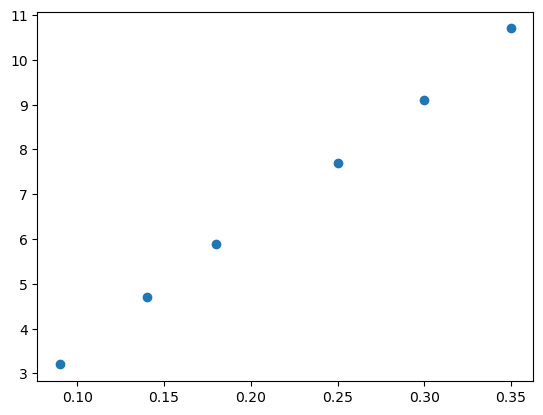

In [4]:
plt.scatter(dfAlkPic['Alk'], dfAlkPic['Peak'])
plt.show()

What do we see? A very good, almost linear relationship. But how do we find that linear regression? To do that, we need to find the coefficients.

We will use the familiar `np.polyfit()` method to find the coefficients of the line. Let's do this, and at the same time let's derive the equation of the line we are looking for.

In [5]:
coefs = np.polyfit(dfAlkPic['Alk'], dfAlkPic['Peak'], 1)
polynom = np.poly1d(coefs)
print(polynom)

 
28.34 x + 0.6966


Now let's put everything into one picture.

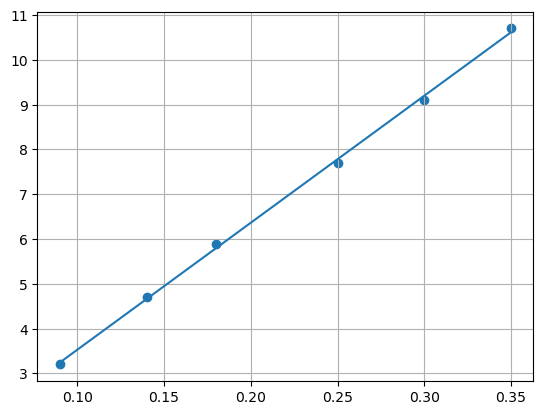

In [6]:
plt.scatter(dfAlkPic['Alk'], dfAlkPic['Peak'])
plt.plot(dfAlkPic['Alk'], polynom(dfAlkPic['Alk']))
plt.grid()
plt.show()

We confirm what we noticed earlier - the styling is almost linear.

### One More Method.

Another method of performing a linear regression is to use the `sklearn.linear_model` library. (Again, it may be that you do not have this library, in which case `pip` will help you.)

In [7]:
from sklearn.linear_model import LinearRegression

There is one nuance here. What type does the `dfAlcPic['Pic']` object have?

In [8]:
type(dfAlkPic['Peak'])

pandas.core.series.Series

As we can see, `series`. But we need an object of type `arrays`. Let's change the types and set variables to refer to them more conveniently later. Also note the construct `.reshape(-1, 1)` - what does it do?

In [9]:
alc = dfAlkPic['Alk'].values.reshape(-1, 1)
pic = dfAlkPic['Peak'].values

Now let's set the model we want and make a fitting.

In [10]:
model = LinearRegression()
model.fit(alc, pic)

LinearRegression()

> If we hadn't done `.reshape(-1, 1)`, the `.fit()` function would have returned an error. Try running it without `.reshape(-1, 1)`.

Let's try to predict the behavior of our regression at two "neighboring" points from the plotted graph: $0.05, 0.40.$

In [11]:
sample = np.array([0.05, 0.40]).reshape(-1, 1)

In [12]:
pred = model.predict(sample)

In [13]:
print(model.coef_)
print(model.intercept_)
print(pred)

[28.33616299]
0.6966044142614587
[ 2.11341256 12.03106961]


What did we just get? The first two conclusions correspond to the unknown coefficients in the straight line equation - compare them with the results above. The last conclusion corresponds to the "prediction" of our regression values at the given points.

> By the way, why is the first conclusion a list?

Let's put it all into one picture.

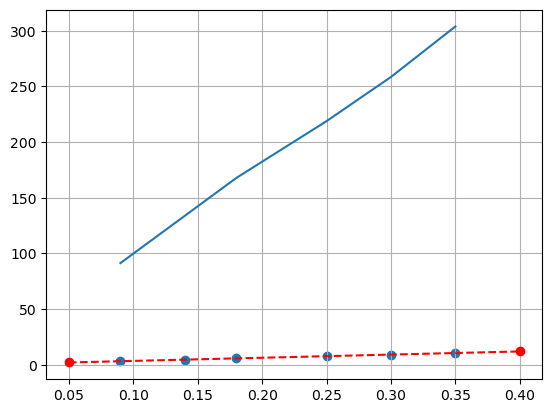

In [14]:
plt.scatter(dfAlkPic['Alk'], dfAlkPic['Peak'])
plt.plot(dfAlkPic['Alk'], polynom(dfAlkPic['Peak']))
plt.plot([0.05, 0.40],pred, 'ro--')
plt.grid()
plt.show()

Of course, within the scope of this exercise, we cannot even describe the library [`scikit-learn`](https://scikit-learn.org/stable/) roughly. But now you know it exists. It is worth saying that it is one of the most used libraries for data analysis and machine learning.

Again you can say, "Okay, let's say we built the straight line. But what if I don't believe my eyes?" This is a very valid question. This question can even be extended to, "How do I know that the model I built is good?" The answer is simple: "You have to use metrics that reflect the quality of the model you built."

We are "lucky" in that our model is very simple. But nevertheless, even with it we can illustrate the general approach.

The value of $R^2$ (approximation reliability value) is measured in the range from $0$ to $1$. The closer it is to unity, the more accurate our regression is. At the same time, if it is far from one, it does not mean that we have built some bad regression - in real problems it can be explained by the presence of other influencing factors. At the same time, if the value is very close to zero, it means that there is no influence of this factor - and therefore it is useless to regress on it.

Let us calculate this coefficient for our model. (In doing so, we strongly suspect that it will be close to $1$).

In [15]:
from sklearn.metrics import r2_score
R2 = r2_score(pic, model.predict(alc))
print(R2)

0.9990505730526149


Which is exactly what I needed to prove.

## Part 2. Error Study for Some Method.

Consider the other two columns of the table. Let's do for them what we did above.

In [16]:
dan = df['Dan']
res = df['Res']

 
0.9749 x + 1.02


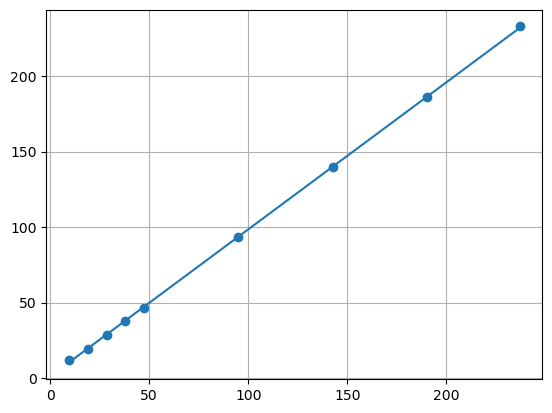

In [17]:
coefs = np.polyfit(dan, res, 1)
polynom = np.poly1d(coefs)
print(polynom)

plt.scatter(dan, res)
plt.plot(dan, polynom(dan))
plt.grid()
plt.show()

In [18]:
danArr = dan.values.reshape(-1, 1)
resArr = res.values

model = LinearRegression()
model.fit(danArr, resArr)

R2 = r2_score(resArr, model.predict(danArr))
print(model.coef_)
print(model.intercept_)
print(R2)

[0.97488549]
1.019711977811781
0.9998922473302879


Since our straight line has the form $y = \texttt{.coef } x + \texttt{.intercept} = ax + b$, the value of the coefficient $a$ can be interpreted as the linear component of the deviation; the coefficient $b$ as the systematic deviation. 

Thus, the measurement gives an underestimation of the value if $a < 1$, and an overestimation if $a > 1$.

Let's calculate the "residuals" for our model (as the difference between the predicted values and the values in the "Rez" column).

In [19]:
print(model.predict(danArr))

[ 10.28112415  19.54253633  28.80394851  38.06536068  47.32677286
  93.63383374 139.94089462 186.24795549 232.06757363]


In [20]:
print(resArr)

[ 12.08  19.42  28.64  37.87  46.37  93.12 139.5  185.96 232.95]


In [21]:
# residuals
residuals = resArr - model.predict(danArr)

In [22]:
print(residuals)

[ 1.79887585 -0.12253633 -0.16394851 -0.19536068 -0.95677286 -0.51383374
 -0.44089462 -0.28795549  0.88242637]


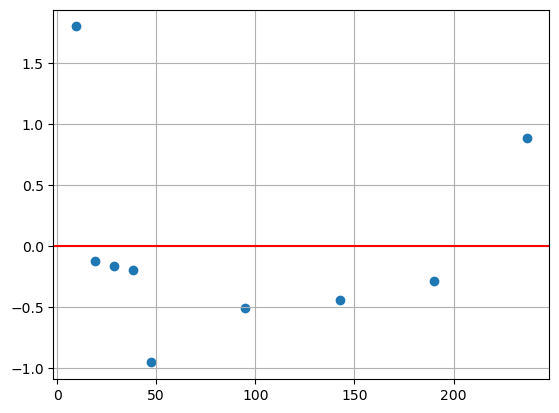

In [23]:
plt.scatter(dan, residuals)
# I added a zero level to better see the difference relative to zero
plt.axhline(y=0, color='red', linewidth=1.5)
plt.grid()
plt.show()

If the value of $R^2$ is close to zero, that is, the regression consideration practically does not reduce the sample variance (the line will be almost parallel to the abscissa axis), then we can test the following hypothesis:

$H_0$: The average does not depend on the parameter $X$, i.e. there is no regression.

That is, we need to perform the $F$-test known to you to check the equality for the two variances: the original sample and the residuals. Recall that if the null hypothesis is true, we will get $F$-value close to one, and $P$-value will be large.

In [24]:
import scipy.stats
def fTest(firstSample, secondSample):
    firstSample = np.array(firstSample)
    secondSample = np.array(secondSample)
    f = np.var(firstSample, ddof=1) / np.var(secondSample, ddof=1)
    dfn = firstSample.size - 1
    dfd = secondSample.size - 1
    p = 1 - scipy.stats.f.cdf(f, dfn, dfd)
    return (f, p)

In [25]:
fTest(dan, residuals)

(9763.779140432272, 3.885780586188048e-15)

The values obtained clearly refute the null hypothesis.

Again:
1. We built a picture, we saw a linear stacking there.
2. We calculated the residuals - they turned out to be small.
3. To be sure, we performed $F$-test to check variance of initial sample and residuals.

## Part 4. Multivariate regression.

Let's take another frame to work with.

In [26]:
dfFlame = pd.read_excel("../Data-EN/Flame.xlsx")

In [27]:
dfFlame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Cl      8 non-null      int64
 1   SO4     8 non-null      int64
 2   PO3     8 non-null      int64
 3   Arrow   8 non-null      int64
dtypes: int64(4)
memory usage: 384.0 bytes


In [28]:
display(dfFlame)

,Cl,SO4,PO3,Arrow
0,0,0,0,214
1,0,0,20,161
2,0,20,0,185
3,0,20,20,132
4,20,0,0,217
5,20,0,20,162
6,20,20,0,190
7,20,20,20,136


Fortunately for us, we need only repeat what we have already done. 

In [29]:
dfFlameFeatures = dfFlame[['Cl', 'SO4', 'PO3']]
arrow = dfFlame['Arrow']

In [30]:
model = LinearRegression()
model.fit(dfFlameFeatures, arrow)
R2 = r2_score(arrow, model.predict(dfFlameFeatures))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(R2)

Coefficients: [ 0.1625 -1.3875 -2.6875]
Intercept: 213.75
0.9993872444724345


We see that the coefficient $R^2$ is almost $1$ again. Consequently, the regression explains almost all of the variation in the data.

## Task.

Complete your individual assignment.